# I] Import

In [1]:
import pandas, numpy, math, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [2]:
# pip install matplotlib-venn

In [3]:
from matplotlib_venn import venn2

In [4]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

## functions & options


In [5]:
#define a function to split after the ".". The 1 is for how many word to have. if we have several dot. The [1] is what is after the dot, and [0] what is before
def split(L):
  return L.split(".",1)[0]

# II] Dataframe settings

## A) Isoform data

In [6]:
%%time
path = input_file_directory + "xenabrowser_brut_data/xena_surv_ATG7.tsv"
df_ori= pandas.read_csv(path, sep = "\t")
print(df_ori.shape)
df_ori.head()

(19131, 31)
Wall time: 113 ms


,sample,samples,_sample_type,_primary_site,ENSG00000197548.12,ENST00000451513.5,ENST00000435760.5,ENST00000451830.5,ENST00000460444.5,ENST00000470474.1,...,ENST00000434066.6,ENST00000478638.5,ENST00000461278.1,ENST00000460291.1,ENST00000467121.1,ENST00000414717.5,ENST00000427759.5,ENST00000446110.1,OS,OS.time
0,TARGET-20-PARUBT-40,TARGET-20-PARUBT-40,Recurrent Blood Derived Cancer - Peripheral Blood,White blood cell,4.401,-9.9660,0.3685,2.656,-0.7108,-1.0860,...,-9.9660,-9.966,-0.6193,-5.0120,-9.966,0.8568,-9.9660,-9.9660,NaN,NaN
1,TARGET-20-PATJHJ-40,TARGET-20-PATJHJ-40,Recurrent Blood Derived Cancer - Peripheral Blood,White blood cell,2.820,-9.9660,-0.1345,-1.595,-2.9320,-9.9660,...,-9.9660,-9.966,-9.9660,-3.3080,-9.966,-2.0530,-2.7270,-0.2328,NaN,NaN
2,TARGET-10-PASLZM-40,TARGET-10-PASLZM-40,Recurrent Blood Derived Cancer - Peripheral Blood,White blood cell,1.158,-9.9660,-2.6350,-1.994,-9.9660,-9.9660,...,-9.9660,-9.966,-9.9660,-3.6260,-9.966,-1.0860,-9.9660,-9.9660,NaN,NaN
3,TARGET-21-PATAIJ-42,TARGET-21-PATAIJ-42,Post treatment Blood Cancer - Blood,White blood cell,4.332,0.2642,1.0850,-1.086,-9.9660,-9.9660,...,-9.9660,-9.966,-9.9660,-1.5950,-9.966,0.3115,-0.6643,1.7230,NaN,NaN
4,TARGET-21-PASVJS-41,TARGET-21-PASVJS-41,Post treatment Blood Cancer - Bone Marrow,White blood cell,5.156,-9.9660,1.6280,-1.732,-2.8260,-0.6643,...,-0.1187,-9.966,-1.3550,0.4125,-9.966,0.2522,-9.9660,2.4310,NaN,NaN


In [7]:
# Column selection
df = df_ori[['sample',
            '_sample_type',
            '_primary_site',
             'OS', 'OS.time',
            'ENSG00000197548.12',
            'ENST00000354449.7', 
            'ENST00000354956.9',
            'ENST00000446450.6']]

# We have Adrenal Gland and Adrenal gland. I need to put "G".
df = df.assign(_primary_site=df['_primary_site'].str.title())

# Column rename
df = df.rename(columns = {'sample' : 'sample',
                    '_sample_type' : 'Sample_Type',
                    'OS.time' : 'OS_time',
                    '_primary_site' : 'Primary_Site',
                    'ENSG00000197548.12': 'ATG7',
                    'ENST00000354449.7': 'ATG7_1',
                    'ENST00000354956.9': 'ATG7_2',
                    'ENST00000446450.6': 'ATG7_3'})

# Calcul to have value from log2;  2**(ATG7(1))-0.001
df = df.assign(ATG7_total= pow(2,df['ATG7'])-0.001,
          ATG7_1tpm= pow(2,df['ATG7_1'])-0.001,
          ATG7_2tpm= pow(2,df['ATG7_2'])-0.001,
          ATG7_3tpm= pow(2,df['ATG7_3'])-0.001)

# Calcul to have log2+1 from value; 
df = df.assign(log2_p1_ATG7_total= numpy.log2(df['ATG7_total']+1),
               log2_p1_ATG7_1= numpy.log2(df['ATG7_1tpm']+1),
               log2_p1_ATG7_2= numpy.log2(df['ATG7_2tpm']+1))

# Calcul to see percentage of expression of the 3 isoforms of ATG7 
df = df.assign(ATG7_prot_tot= df['ATG7_1tpm'] + df['ATG7_2tpm'] + df['ATG7_3tpm'])

df = df.assign(ATG7_1perc= (df['ATG7_1tpm'] *100)/ df['ATG7_prot_tot'],
              ATG7_2perc= (df['ATG7_2tpm'] *100)/ df['ATG7_prot_tot'],
              ATG7_3perc= (df['ATG7_3tpm'] *100)/ df['ATG7_prot_tot'])                              

#Add columns, normalized on total
df = df.assign(ATG7_1norm= df['ATG7_1tpm']/df["ATG7_total"],
               ATG7_2norm= df['ATG7_2tpm']/df["ATG7_total"])                                   

df.head()

,sample,Sample_Type,Primary_Site,OS,OS_time,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,...,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,TARGET-20-PARUBT-40,Recurrent Blood Derived Cancer - Peripheral Blood,White Blood Cell,NaN,NaN,4.401,1.3900,1.522,-1.7320,21.125765,...,3.000343e-01,4.467655,1.855905,1.952665,5.790710,45.241201,49.577495,5.181305,0.124009,0.135895
1,TARGET-20-PATJHJ-40,Recurrent Blood Derived Cancer - Peripheral Blood,White Blood Cell,NaN,NaN,2.820,1.1180,-1.086,-9.9660,7.060624,...,-1.495113e-07,3.010892,1.664236,0.555881,2.639524,82.191280,17.808726,-0.000006,0.307262,0.066576
2,TARGET-10-PASLZM-40,Recurrent Blood Derived Cancer - Peripheral Blood,White Blood Cell,NaN,NaN,1.158,0.0158,-3.171,-3.8160,2.230479,...,7.000183e-02,1.691748,1.007204,0.150597,1.190042,84.871949,9.245753,5.882299,0.452823,0.049329
3,TARGET-21-PATAIJ-42,Post treatment Blood Cancer - Blood,White Blood Cell,NaN,NaN,4.332,1.3450,1.975,-9.9660,20.139115,...,-1.495113e-07,4.401843,1.823465,2.301670,6.469584,39.249848,60.750154,-0.000002,0.126088,0.195157
4,TARGET-21-PASVJS-41,Post treatment Blood Cancer - Bone Marrow,White Blood Cell,NaN,NaN,5.156,1.8040,3.769,0.5069,35.653197,...,1.419994e+00,5.195867,2.166995,3.871026,18.542569,18.826249,73.515731,7.658019,0.097912,0.382342


In [9]:
#what kind of samples are the data ? 
df['Sample_Type'].value_counts()

Primary Tumor                                        9185
Normal Tissue                                        7429
Solid Tissue Normal                                   738
Cell Line                                             433
Metastatic                                            393
Primary Solid Tumor                                   286
Primary Blood Derived Cancer - Peripheral Blood       239
Primary Blood Derived Cancer - Bone Marrow            237
Recurrent Blood Derived Cancer - Bone Marrow          104
Recurrent Tumor                                        45
Recurrent Solid Tumor                                  13
Post treatment Blood Cancer - Bone Marrow              12
Additional - New Primary                               11
Recurrent Blood Derived Cancer - Peripheral Blood       3
Additional Metastatic                                   1
Control Analyte                                         1
Post treatment Blood Cancer - Blood                     1
Name: Sample_T

In [10]:
#what kind of samples are the data ? 
df['Primary_Site'].value_counts()

Brain                         1846
Lung                          1410
Breast                        1391
Skin                          1282
Kidney                        1193
Esophagus                      848
Prostate                       648
Colon                          639
Stomach                        624
Blood Vessel                   606
White Blood Cell               595
Thyroid Gland                  571
Head And Neck Region           564
Liver                          531
Adipose Tissue                 515
Ovary                          515
Blood                          444
Bladder                        435
Muscle                         396
Heart                          377
Pancreas                       350
Testis                         319
Cervix                         309
Thyroid                        279
Nerve                          278
Soft Tissue,Bone               264
Adrenal Gland                  205
Endometrium                    204
Paraganglia         

In [11]:
#Creation of two dataframe for blood only
##Normal tissue=Blood and Primary tumor=Bone Marrow & Peripheral Blood.
df_ATG7_Normal = df[(df['Primary_Site'] == 'Blood Vessel') | 
                      (df['Primary_Site'] == 'Blood') & (df['Sample_Type'] != 'Cell Line')]

df_ATG7_Primary = df[df['Sample_Type'].str.match('(Primary Blood Derived Cancer - Bone Marrow)|(Primary Blood Derived Cancer - Peripheral Blood)')]

print('normal_tissue' , len(df_ATG7_Normal))
print('primary_tumors' , len(df_ATG7_Primary))

normal_tissue 943
primary_tumors 476


In [12]:
df_ATG7_Primary.head(1)

,sample,Sample_Type,Primary_Site,OS,OS_time,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,...,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
16,TARGET-21-PASLZE-09,Primary Blood Derived Cancer - Bone Marrow,White Blood Cell,NaN,NaN,5.59,2.23,3.584,0.7916,48.166896,...,1.729993,5.619615,2.508515,3.69944,18.41133,25.475291,65.128358,9.396351,0.097377,0.248947


In [13]:
# Column rename
df_ATG7_Primary = df_ATG7_Primary.rename(columns = {'Sample_Type' : 'Primary_Site',
                                                    'Primary_Site' : 'Sample_Type'})
#replace texts to have a better table
df_ATG7_Primary['Sample_Type'] = df_ATG7_Primary['Sample_Type'].str.replace('White Blood Cell', 'Primary Blood Derived Cancer')
df_ATG7_Primary['Primary_Site'] = df_ATG7_Primary['Primary_Site'].str.replace('Primary Blood Derived Cancer - ', '')

df_ATG7_Primary.head(2)

,sample,Primary_Site,Sample_Type,OS,OS_time,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,...,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
16,TARGET-21-PASLZE-09,Bone Marrow,Primary Blood Derived Cancer,NaN,NaN,5.590,2.2300,3.584,0.7916,48.166896,...,1.729993,5.619615,2.508515,3.699440,18.411330,25.475291,65.128358,9.396351,0.097377,0.248947
17,TARGET-21-PANZLR-09,Bone Marrow,Primary Blood Derived Cancer,NaN,NaN,5.048,0.4125,3.216,0.6969,33.081584,...,1.620018,5.090920,1.220324,3.363321,12.241078,10.864977,75.900749,13.234275,0.040203,0.280853


In [14]:
# create df with only Normal and Primary 
df_ATG7_NormPrim = pandas.concat([df_ATG7_Normal, df_ATG7_Primary], axis=0)
df_ATG7_NormPrim.reset_index(drop=True, inplace=True)

In [15]:
df_ATG7_NormPrim['Sample_Type'].value_counts()

Normal Tissue                   943
Primary Blood Derived Cancer    476
Name: Sample_Type, dtype: int64

In [16]:
df_ATG7_NormPrim['Primary_Site'].value_counts()

Blood Vessel        606
Blood               337
Peripheral Blood    239
Bone Marrow         237
Name: Primary_Site, dtype: int64

## B) Whole gene expression

In [17]:
%%time
# DL data gene expression for Normal Tissue and Primary Tumors
input_file_directory_gene_expr = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 Python Analysis/gene_expr_preparation/'
path = output_file_directory + "dataframes_for_input/blood/"

directory = path + "ensembl_normal_blood_protcoding_expr.tsv"
normal_blood_protcoding= pandas.read_csv(directory, sep = "\t")
print("Normal tissue = Blood Vessel + Blood. Shape:", normal_blood_protcoding.shape)

directory = path + "ensembl_primary_blood_protcoding_expr.tsv"
primary_blood_protcoding= pandas.read_csv(directory, sep = "\t")
print("White Blood Cell, Primary Blood Derived Cancer = Peripheral Blood & Bone Marrow. Shape:", primary_blood_protcoding.shape)
primary_blood_protcoding.head(2)

Normal tissue = Blood Vessel + Blood. Shape: (943, 19383)
White Blood Cell, Primary Blood Derived Cancer = Peripheral Blood & Bone Marrow. Shape: (476, 19383)
Wall time: 18.8 s


,sample,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
0,TARGET-10-PAMXHJ-09,13.4466,14.1354,14.8637,14.670,15.2483,14.1204,14.5576,11.6280,13.5521,...,5.4357,5.2028,5.1461,-2.2447,4.2706,4.0799,0.346,5.2631,6.2163,1.6093
1,TARGET-10-PAMXSP-09,14.3048,14.8800,14.6638,14.581,15.6861,14.5357,15.2548,12.5331,13.5130,...,7.3205,4.8885,2.6783,-1.3548,4.2699,2.2901,0.058,5.1306,7.0387,2.6464


In [18]:
#see how many duplicates in genes
print('normal shape:', normal_blood_protcoding.shape)
print('number of duplicated genes:', normal_blood_protcoding.columns.duplicated().sum())
print()
print('primary shape is:', primary_blood_protcoding.shape)
print('number of duplicated genes:', primary_blood_protcoding.columns.duplicated().sum())

normal shape: (943, 19383)
number of duplicated genes: 0

primary shape is: (476, 19383)
number of duplicated genes: 0


In [19]:
#Preparation of the global dataframe with ATG7
data = [[normal_blood_protcoding, df_ATG7_NormPrim], [primary_blood_protcoding, df_ATG7_NormPrim]]

df_final = []

for df in data:
    #Merge the two df to have ATG7 isoform expression + whole gene expression 
  df_merged = pandas.merge(df[1], df[0], on= 'sample')

  #delete the sample column and select column
  df_merged = df_merged.drop(df_merged.columns[8:22], axis=1)

  #save in list
  df_final.append(df_merged)

normal_blood_protcoding_atg7_expr = df_final[0]
primary_blood_protcoding_atg7_expr = df_final[1]

print(normal_blood_protcoding_atg7_expr.shape)
print(primary_blood_protcoding_atg7_expr.shape)
normal_blood_protcoding_atg7_expr.head()

(943, 19390)
(476, 19390)


,sample,Sample_Type,Primary_Site,OS,OS_time,ATG7,ATG7_1,ATG7_2,ENSG00000198888,ENSG00000198763,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
0,GTEX-R55D-1026-SM-3GAEQ,Normal Tissue,Blood Vessel,NaN,NaN,4.788,3.790,2.4220,13.2858,13.3810,...,0.6239,5.4585,5.6826,1.9712,4.9519,5.5534,1.5709,5.6826,3.7421,5.2200
1,GTEX-ZYVF-0826-SM-5E447,Normal Tissue,Blood Vessel,NaN,NaN,4.743,2.761,2.3050,11.7077,12.3614,...,0.6517,5.6082,5.4390,2.9090,6.1056,4.8778,2.6138,5.9540,2.6918,5.7173
2,GTEX-Q734-2226-SM-3GAD9,Normal Tissue,Blood Vessel,NaN,NaN,4.598,3.530,0.7999,12.3145,12.6877,...,1.4120,6.1310,5.7010,1.1382,5.5802,5.2661,2.4753,5.9381,4.8450,4.8390
3,GTEX-1399S-0926-SM-5PNVQ,Normal Tissue,Blood Vessel,NaN,NaN,4.584,3.650,1.4120,12.2836,12.4268,...,3.4971,5.0370,5.1473,2.6670,4.8968,6.1098,1.5854,5.7960,4.8177,7.1084
4,GTEX-OXRO-1926-SM-2S1O3,Normal Tissue,Blood Vessel,NaN,NaN,4.574,3.203,1.6000,13.3234,13.3712,...,0.4552,5.6941,4.9303,1.8160,5.5475,4.9199,2.3788,5.1065,2.4144,4.5844


In [57]:
normal_sample_labels

,sample,Sample_Type,Primary_Site
0,GTEX-R55D-1026-SM-3GAEQ,Normal Tissue,Blood Vessel
1,GTEX-ZYVF-0826-SM-5E447,Normal Tissue,Blood Vessel
2,GTEX-Q734-2226-SM-3GAD9,Normal Tissue,Blood Vessel
3,GTEX-1399S-0926-SM-5PNVQ,Normal Tissue,Blood Vessel
4,GTEX-OXRO-1926-SM-2S1O3,Normal Tissue,Blood Vessel
...,...,...,...
938,GTEX-11PRG-0005-SM-5NQ6X,Normal Tissue,Blood
939,GTEX-147F4-0006-SM-5O99T,Normal Tissue,Blood
940,GTEX-NPJ8-0007-SM-26GMF,Normal Tissue,Blood
941,GTEX-QMR6-0005-SM-32PKY,Normal Tissue,Blood


In [58]:
#select samples label to have the good samples for the complete ATG7 dataframe
normal_sample_labels = normal_blood_protcoding_atg7_expr.iloc[:,0:3]
normal_blood_sample_labels = normal_sample_labels[normal_sample_labels['Primary_Site'] == 'Blood']
normal_vessblood_sample_labels = normal_sample_labels[normal_sample_labels['Primary_Site'] == 'Blood Vessel']

primary_sample_labels = primary_blood_protcoding_atg7_expr.iloc[:,0:3]                  
primary_periph_sample_labels = primary_sample_labels[primary_sample_labels['Primary_Site'] == 'Peripheral Blood']
primary_bonemarrow_sample_labels = primary_sample_labels[primary_sample_labels['Primary_Site'] == 'Bone Marrow']

primary_bonemarrow_sample_labels['Primary_Site'].value_counts()

Bone Marrow    237
Name: Primary_Site, dtype: int64

In [60]:
#subset
df_ATG7_Normal_blood = normal_blood_sample_labels.merge(df_ATG7_NormPrim)
df_ATG7_Normal_Vessblood = normal_vessblood_sample_labels.merge(df_ATG7_NormPrim)
df_ATG7_Primary_periph = primary_periph_sample_labels.merge(df_ATG7_NormPrim)
df_ATG7_Primary_bonemarrow = primary_bonemarrow_sample_labels.merge(df_ATG7_NormPrim)

print("Blood:", df_ATG7_Normal_blood.shape)
print("Vessblood:",df_ATG7_Normal_Vessblood.shape)
print("Periph:",df_ATG7_Primary_periph.shape)
print("Bone_Marrow:",df_ATG7_Primary_bonemarrow.shape)

df_ATG7_Primary_periph.head(2)

Blood: (337, 22)
Vessblood: (606, 22)
Periph: (239, 22)
Bone_Marrow: (237, 22)


,sample,Sample_Type,Primary_Site,OS,OS_time,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,...,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,TCGA-AB-2916-03,Primary Blood Derived Cancer,Peripheral Blood,0.0,882.0,6.916,3.553,4.103,2.095,120.759096,...,4.271262,6.927886,3.670848,4.184524,33.190400,35.359823,51.77121,12.868967,0.097186,0.142292
1,TCGA-AB-2837-03,Primary Blood Derived Cancer,Peripheral Blood,1.0,0.0,6.886,4.168,4.308,1.516,118.273889,...,2.858970,6.898134,4.246028,4.378986,40.640813,44.228934,48.73634,7.034726,0.151978,0.167466


In [32]:
# create df with only Normal and Primary 
df_Norm_Prim = pandas.concat([df_ATG7_Normal_blood, df_ATG7_Primary_blood], axis=0)
df_Norm_Prim.reset_index(drop=True, inplace=True)

# III] ATG7 expression

# A) Distribution

In [52]:
len(df)

3

In [106]:
df_test = pandas.concat([df_ATG7_Normal_blood, df_ATG7_Normal_Vessblood,
                        df_ATG7_Primary_periph, df_ATG7_Primary_bonemarrow], axis=0)

df_test['Primary_Site'] = df_test['Primary_Site'].astype(str)
df_test.shape

(1419, 22)

In [107]:
df_test['Primary_Site']

0            Blood
1            Blood
2            Blood
3            Blood
4            Blood
          ...     
232    Bone Marrow
233    Bone Marrow
234    Bone Marrow
235    Bone Marrow
236    Bone Marrow
Name: Primary_Site, Length: 1419, dtype: object

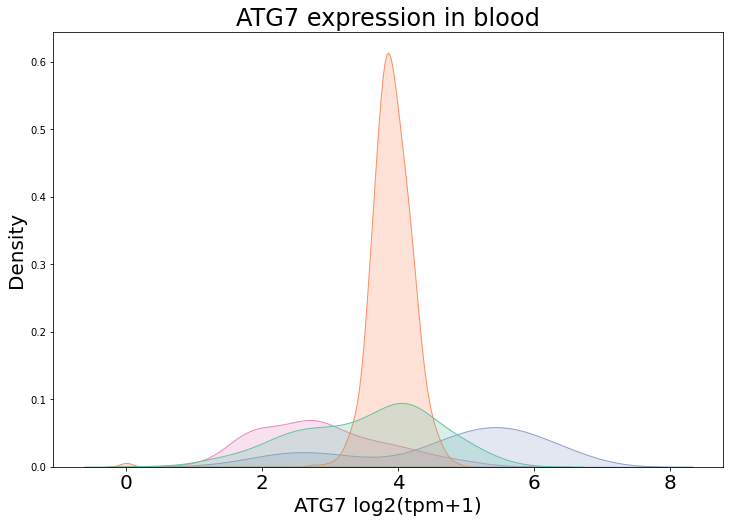

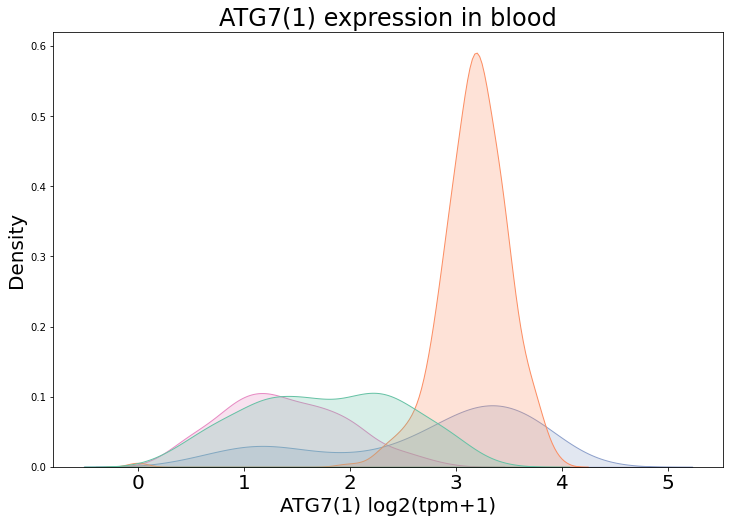

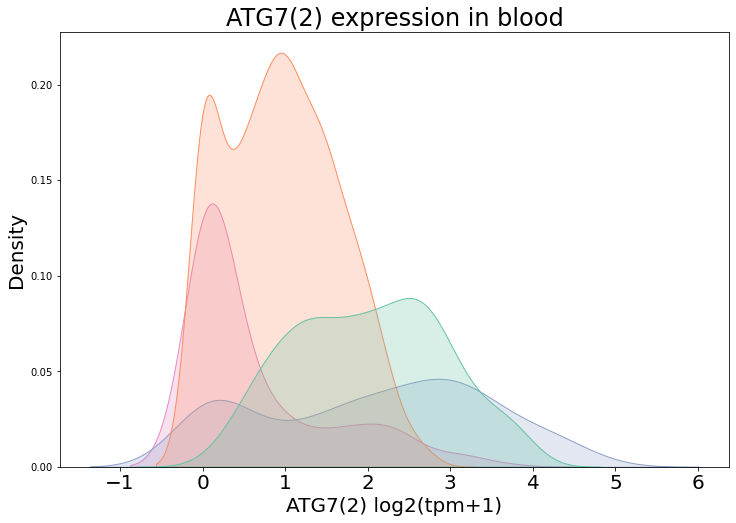

In [117]:
# Distribution graph, for ATG7, iso1 & iso2
df_test

isoforms = [['log2_p1_ATG7_total', 'ATG7'], 
            ['log2_p1_ATG7_1', 'ATG7(1)'], 
            ['log2_p1_ATG7_2', 'ATG7(2)']]

for isoform in isoforms:
    seaborn.kdeplot(data = df_test, x= isoform[0],
                    hue="Primary_Site", palette = 'Set2', 
                    common_norm = True,
                    fill = True, legend=False
                   )

    plt.xlabel(isoform[1]+ ' log2(tpm+1)')
    plt.title(isoform[1]+ ' expression in blood')
#     plt.legend(title = 'Sample Type')
    plt.show()

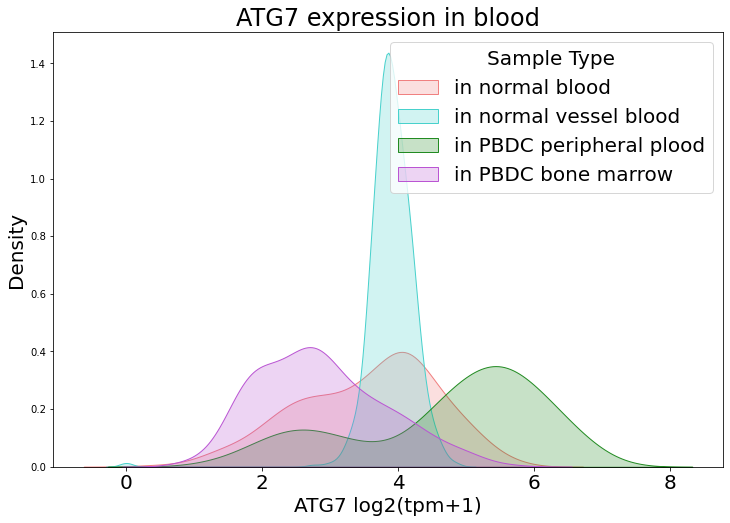

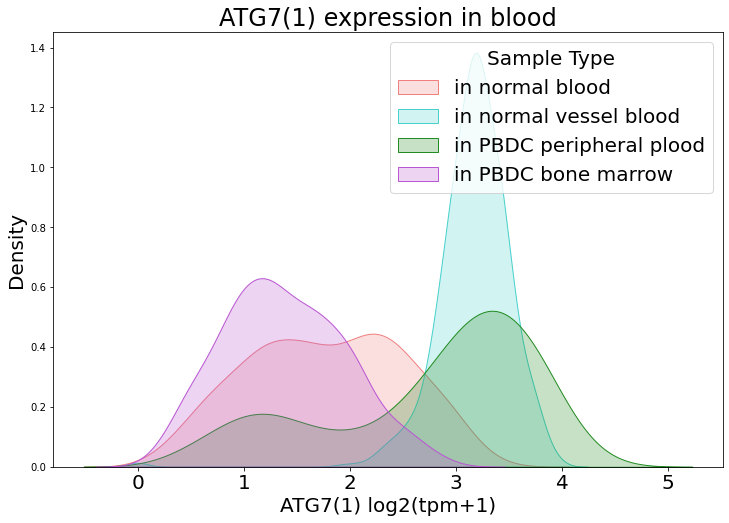

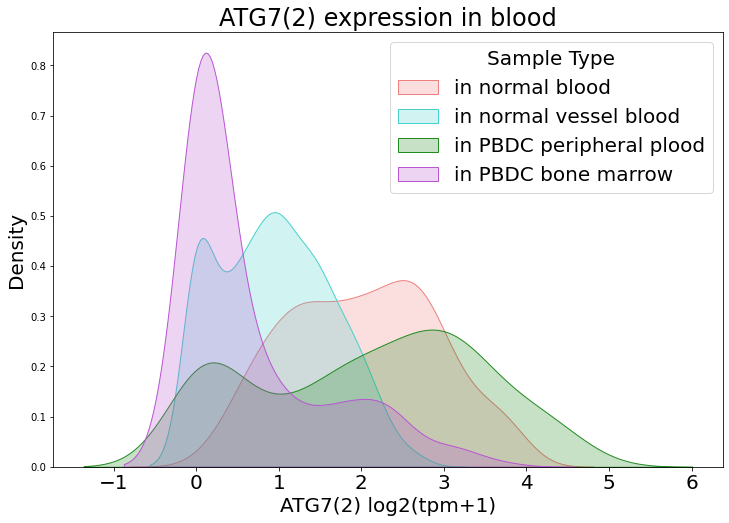

In [69]:
# Distribution graph, for ATG7, iso1 & iso2
all_dfs = [[df_ATG7_Normal_blood, 'in normal blood', 'lightcoral'], 
           [df_ATG7_Normal_Vessblood, 'in normal vessel blood', 'mediumturquoise'],
           [df_ATG7_Primary_periph, 'in PBDC peripheral plood', 'forestgreen'],
           [df_ATG7_Primary_bonemarrow, 'in PBDC bone marrow', 'mediumorchid']]

isoforms = [['log2_p1_ATG7_total', 'ATG7'], 
            ['log2_p1_ATG7_1', 'ATG7(1)'], 
            ['log2_p1_ATG7_2', 'ATG7(2)']]

for isoform in isoforms:
    for df in all_dfs:
        xData = df[0][isoform[0]]
        seaborn.kdeplot(xData, common_norm = True, color = df[2], fill = True, label = df[1])
    
        plt.xlabel(isoform[1]+ ' log2(tpm+1)')
        plt.title(isoform[1]+ ' expression in blood')
        plt.legend(title = 'Sample Type')
    plt.show()

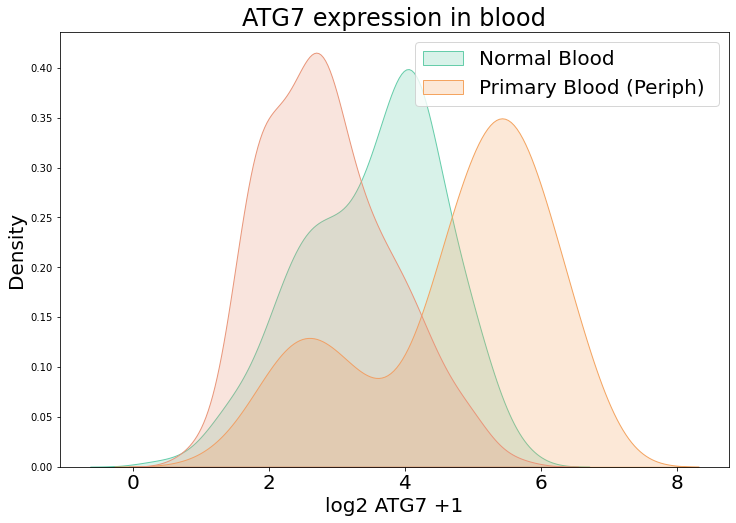

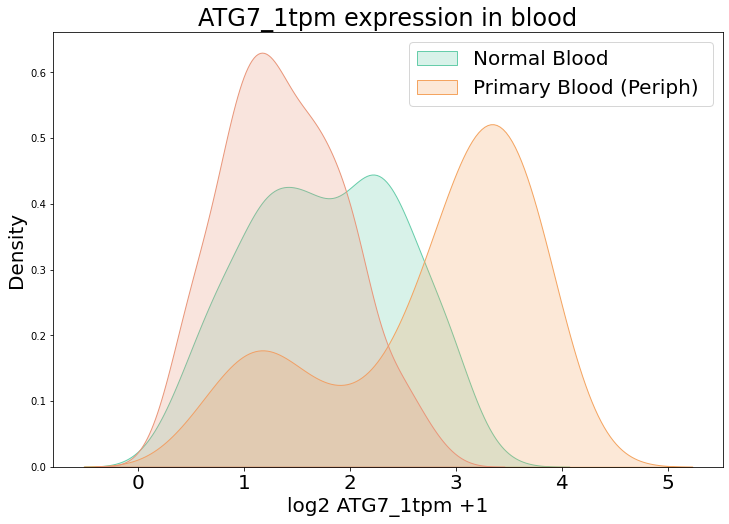

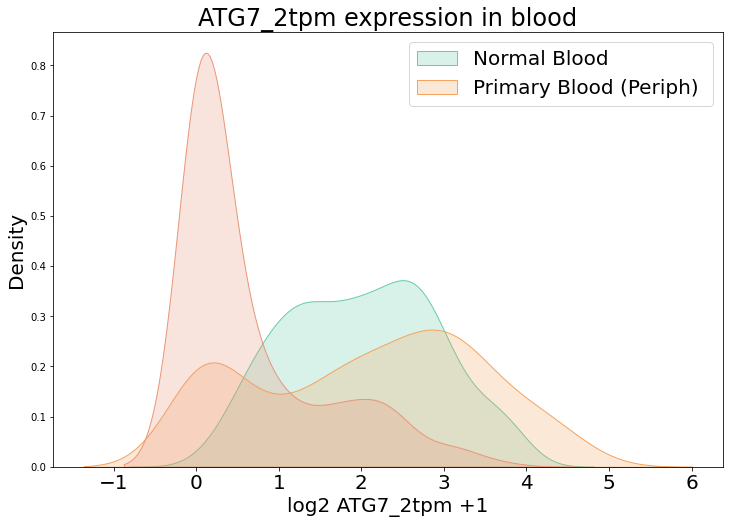

<Figure size 864x576 with 0 Axes>

In [38]:
# Distribution graph, for ATG7, iso1 & iso2
all_dfs = [[df_ATG7_Normal_blood, 'Blood', 
            df_ATG7_Normal_Vessblood, 'Vessel Blood',
            df_ATG7_Primary_periph, 'PBDC Peripheral Blood',
            df_ATG7_Primary_bonemarrow, 'PBDC Bone Marrow']]

isoforms = [['log2_p1_ATG7_total', 'ATG7'], 
            ['log2_p1_ATG7_1', 'ATG7_1tpm'], 
            ['log2_p1_ATG7_2', 'ATG7_2tpm']]

for df in all_dfs:
  for isoform in isoforms:
    xData = df[0][isoform[0]]
    x2Data = df[2][isoform[0]]
    x3Data = df[4][isoform[0]]
    x4Data = df[6][isoform[0]]

    seaborn.kdeplot(xData, color = 'mediumaquamarine', fill = True, label = )
    seaborn.kdeplot(x2Data, color = 'mediumturquoise', fill = True)
    seaborn.kdeplot(x3Data, color = 'sandybrown', fill = True)
    seaborn.kdeplot(x4Data, color = 'darksalmon', fill = True)

    plt.xlabel('log2 '+ isoform[1]+ ' +1')
    plt.title(isoform[1]+ ' expression ' + df[1] )
    plt.legend(labels=["Normal Blood","Primary Blood (Periph) "])
    plt.show()
    plt.clf()

##B) Percentage do not express ATG7 isoforms

In [ ]:
#Percentage of patients: 
all_dfs = [[df_ATG7_Normal_blood, 'all Normal Blood'], [df_ATG7_Primary_blood, 'all primary tumor']]

isoforms = [['ATG7(total)', 'ATG7'], ['ATG7(1)', 'ATG7(1)'], ['ATG7(2)', 'ATG7(2)'], ['ATG7(3)', 'ATG7(3)']]

for df in all_dfs:
  print(df[1])
  for isoform in isoforms:
        
    QUOI = isoform[1]
    OU = df[1]
    all = (df[0][isoform[0]]).shape
    no_exp = (df[0][isoform[0]]<0.1).sum()
    perc_no_exp = (no_exp*100)/all
    perc_no_exp = float(perc_no_exp)

    # print("The percentage of patient who do not express", QUOI, OU, "is:", round(perc_no_exp,1),'%')
    print(round(perc_no_exp,1),'% of tumor do not express', QUOI)
  print()


## C) Expression figures

### 1) Value TPM

In [ ]:
# Distribution: Data preparation + graph
data = [[df_Norm_Prim, 'all tissue']]

for df in data:
   
  shape = df[0].shape
  shape = shape[0]
  print(shape)

  #select the sample type column
  sample_type = {'sample_type':[df[0].iloc[:,1][i]
      for i in range(0, shape)]}

  #convert to df, and copy it 3 times
  sample_typedf = pandas.DataFrame(sample_type)
  sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf])
  sample_typedf.reset_index(drop=True, inplace=True)

  # Y for expression value 
  y = {'y':[df[0].iloc[:,j][i]
      for j in range(7,10)
        for i in range(0, shape)]}

  #create df with Y 
  data_distrib = pandas.DataFrame(y)

  # X for ATG7/iso1/iso2
  data_distrib['x'] = ''
  data_distrib['x'][: shape] = 'ATG7'
  data_distrib['x'][shape: shape*2] = 'ATG7(1)'
  data_distrib['x'][shape*2:] = 'ATG7(2)'

  # Will be used for Hue
  data_distrib['Sample Type'] = sample_typedf['sample_type']

  #graph
  seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.2, kind="box", palette = 'Set2', data = data_distrib, 
                  boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)
  
  plt.ylabel('Expression of ATG7 (TPM)')
  plt.xlabel('')
  plt.title('ATG7 expression in '+ df[1], x=.55)

In [ ]:
# Distribution: Data preparation + graph
data = [[df_Norm_Prim, 'all tissue']]

for df in data:
   
  shape = df[0].shape
  shape = shape[0]
  print(shape)

  #select the sample type column
  sample_type = {'sample_type':[df[0].iloc[:,1][i]
      for i in range(0, shape)]}

  #convert to df, and copy it 3 times
  sample_typedf = pandas.DataFrame(sample_type)
  sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf])
  sample_typedf.reset_index(drop=True, inplace=True)

  # Y for expression value 
  y = {'y':[df[0].iloc[:,j][i]
      for j in range(8,10)
        for i in range(0, shape)]}

  #create df with Y 
  data_distrib = pandas.DataFrame(y)

  # X for ATG7/iso1/iso2
  data_distrib['x'] = ''
  data_distrib['x'][: shape] = 'ATG7(1)'
  data_distrib['x'][shape: shape*2] = 'ATG7(2)'

  # Will be used for Hue
  data_distrib['Sample Type'] = sample_typedf['sample_type']

  #graph
  seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.2, kind="box", palette = 'Set2', data = data_distrib, 
                  boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)
  
  plt.ylabel('Expression of ATG7 (TPM)')
  plt.xlabel('')
  plt.title('ATG7 expression in '+ df[1], x=.55)

In [ ]:
#Distribution: Stats for all 

all_dfs = [[df_ATG7_Normal_blood, 'all Normal Blood', df_ATG7_Primary_blood, 'in primary blood (periph)']]

isoforms = ['ATG7', 'ATG7(1)', 'ATG7(2)']

for df in all_dfs:
  for isoform in isoforms:

    n1 = "{:.3f}".format(numpy.median(df[0][isoform]))
    n2 = "{:.3f}".format(numpy.median(df[2][isoform]))

    # Mann-Whitney analysis 
    statistic, pvalue = scipy.stats.mannwhitneyu(df[0][isoform], df[2][isoform])
    Pvalue = "{:.3E}".format(pvalue)
    print("the pvalue between", df[1]+'('+n1+')', "and", df[3]+'('+n2+')', "for", isoform, 'is', Pvalue)
  print()


In [ ]:
#median brut file to compare 
print(df_Norm_Prim['ATG7(total)'].mean())
print(df_Norm_Prim['ATG7(1)'].mean())
print(df_Norm_Prim['ATG7(2)'].mean())

In [ ]:
#median after modification to be sure I selected the good ones
data_distribtest = data_distrib[data_distrib['x'] == 'ATG7']
data_distribtest1 = data_distrib[data_distrib['x'] == 'ATG7(1)']
data_distribtest2 = data_distrib[data_distrib['x'] == 'ATG7(2)']
print(data_distribtest.mean())
print(data_distribtest1.mean())
print(data_distribtest2.mean())

### 2) Normalized

In [ ]:
# NORMALiZED Distribution: Data preparation + graph

data = [[df_Norm_Prim, 'all_tissue']]

for df in data:
   
  shape = df[0].shape
  shape = shape[0]
  print(shape)

  #select the sample type column
  sample_type = {'sample_type':[df[0].iloc[:,1][i]
      for i in range(0, shape)]}

  #convert to df, and copy it 3 times
  sample_typedf = pandas.DataFrame(sample_type)
  sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf])
  sample_typedf.reset_index(drop=True, inplace=True)

  # Y for expression value 
  y = {'y':[df[0].iloc[:,j][i]
      for j in range(18,20)
        for i in range(0, shape)]}

  #create df with Y 
  data_distrib = pandas.DataFrame(y)

  # X for iso1/ATG7 and iso2/ATG7
  data_distrib['x'] = ''
  data_distrib['x'][: shape] = 'ATG7(1)/ATG7'
  data_distrib['x'][shape:] = 'ATG7(2)/ATG7'


  # Will be used for Hue
  data_distrib['Sample Type'] = sample_typedf['sample_type']

  #graph
  seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.2, kind="box", palette = 'Set2', data = data_distrib, 
                  boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)
  
  plt.ylabel('ATG7 isoforms/total ATG7 in TPM')
  plt.xlabel('')
  plt.title('ATG7 proportion in '+ df[1], x=0.55)


In [ ]:
#NORMALIZED Distribution: Stats for all 

all_dfs = [[df_ATG7_Normal_blood, 'all Normal Blood', df_ATG7_Primary_blood, 'in primary blood (periph)']]

isoforms = ['ATG7(1)norm', 'ATG7(2)norm']
print('NORMALIZED')

for df in all_dfs:
  for isoform in isoforms:

    n1 = "{:.3f}".format(numpy.median(df[0][isoform]))
    n2 = "{:.3f}".format(numpy.median(df[2][isoform]))

    # Mann-Whitney analysis 
    statistic, pvalue = scipy.stats.mannwhitneyu(df[0][isoform], df[2][isoform])
    Pvalue = "{:.3E}".format(pvalue)
    print("the pvalue between", df[1]+'('+n1+')', "and", df[3]+'('+n2+')', "for", isoform, 'is', Pvalue)
  print()


# IV] Expression correlation 

## 1) between the two isoforms

In [ ]:
#isoform correlation in blood 
#three values are very high and make my graph ugly... I remove them.
df_ATG7_Primary_blood2 = df_ATG7_Primary_blood[df_ATG7_Primary_blood['ATG7(1)'] < 30 ]
print("shape:",df_ATG7_Primary_blood.shape)
print("shape after removing extrem dots:",df_ATG7_Primary_blood2.shape)


tissues = [[df_ATG7_Normal_blood, "Normal Blood"], [df_ATG7_Primary_blood2, "primary tumors"]]

for tissue in tissues: 
  x = tissue[0]['ATG7(1)'].to_list()
  y = tissue[0]['ATG7(2)'].to_list()

  r_value, p_value = scipy.stats.spearmanr(x, y)
  print("The correlation between iso1 and iso2 in",tissue[1],"is:", r_value, p_value)

  seaborn.regplot(x=x,y=y, x_bins=800, x_ci = 0, marker="+")
  name = "Correlation between the two isoforms in "+  tissue[1]
  plt.title(name)
  plt.xlabel("ATG7(1) expression in tpm")
  plt.ylabel('ATG7(2) expression tpm')
  plt.show()
  plt.clf()
  print()


##2) between all protein coding

In [ ]:
#to know the ensembl code for HK2
protein_coding_list.loc[protein_coding_list['hgnc_symbol'] == 'MFAP3']

In [ ]:
# Spearman Correlation, main genes 
all_tissue_used = [[normal_blood_protcoding_atg7_expr,'Normal Blood'], [primary_blood_protcoding_atg7_expr,'Primary Blood (Periph)']]

HK2 = 'ENSG00000159399'
YAP1 = 'ENSG00000137693'
AJUBA = 'ENSG00000129474'
YBX1 = 'ENSG00000065978'
TGFB1 = 'ENSG00000105329'
ATG7_1 = 'ATG7_1'
ATG7_2 = 'ATG7_2'
MTDH = 'ENSG00000147649'
MAPK1 = 'ENSG00000100030'
KPNA1 = 'ENSG00000114030'
TNPO1 = 'ENSG00000083312'

for tissue in all_tissue_used:
  genes_x = [[KPNA1,'KPNA1'], [MAPK1, 'MAPK1'], [TNPO1,'TNPO1'], [MTDH,'MTDH'], 
             [HK2, "HK2"], [YAP1, 'YAP1'], [AJUBA,'AJUBA'], [YBX1,'YBX1'], 
             [TGFB1,'TGFB1'], [ATG7_1,'ATG7_1'], [ATG7_2,'ATG7_2']]

  print(tissue[1])

  for gene in genes_x:
    x = tissue[0][gene[0]].to_list()
    y = tissue[0]['ATG7'].to_list()
    y1 = tissue[0]['ATG7_1'].to_list()
    y2 = tissue[0]['ATG7_2'].to_list()  
  
    r_value, p_value = scipy.stats.spearmanr(x, y)
    print('  correlation between ATG7 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
    r_value, p_value = scipy.stats.spearmanr(x, y1)
    print('  correlation between ATG7_1 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
    r_value, p_value = scipy.stats.spearmanr(x, y2)
    print('  correlation between ATG7_2 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
    print()

In [ ]:
normal_blood_protcoding_atg7_expr.head()

In [ ]:
%%time
# Spearman Correlation, all genes WITHOUT cutoff
all_tissue_used = [[normal_blood_protcoding_atg7_expr,'Normal_blood'], [primary_blood_protcoding_atg7_expr,'Primary_Blood_Periph']]

isoforms = ['ATG7_1', 'ATG7_2']

all_positiv_corr_spearman = []
all_negativ_corr_spearman = []

for tissue in all_tissue_used:
  print(tissue[1], tissue[0].shape)

  #create a new row with max() for each gene and transpose
  tissue[0].loc['max()'] = tissue[0].max()
  tissue[0] = tissue[0].T

  #select all row where max() > 2.3 (= 5 tpm)
  nb_before = tissue[0]['max()'].count()
  tissue[0] = tissue[0].drop(tissue[0].index[0:3])
  tissue[0] = tissue[0][tissue[0]['max()'] > 2.3]
  nb_after = tissue[0]['max()'].count()
  print("number of genes removed:", nb_before-nb_after)
  print('the minimum of TPM is', tissue[0]['max()'].min())
  
  #delete the column max() and tranpose back
  tissue[0] =  tissue[0].drop('max()', axis = 1) 
  tissue[0] = tissue[0].T
  print('nombre genes after removing < 4tpm', tissue[0].shape)

  for isoform in isoforms:

    genepos = []
    geneneg = []
    rvaluepos = []
    rvalueneg = []
    pvaluepos = []
    pvalueneg = []

    print(isoform)
    x = tissue[0][isoform].to_list()
    genes = tissue[0].columns[3:]

    for gene in genes:
      y = tissue[0][gene].to_list()
      r_value, p_value = scipy.stats.spearmanr(x, y)

      if r_value > 0:
        genepos.append(gene)
        rvaluepos.append(r_value)
        pvaluepos.append(p_value)
        
      elif r_value < 0:
        geneneg.append(gene)
        rvalueneg.append(r_value)
        pvalueneg.append(p_value)

    #create a dictionnary
    d = dict(ensembl_gene_id= genepos, r_value=rvaluepos,  p_value=pvaluepos)
    d2 = dict(ensembl_gene_id= geneneg, r_value=rvalueneg,  p_value=pvalueneg)

    #Convert to dataframe
    df_positiv_corr = pandas.DataFrame.from_dict(d, orient='index')
    df_negativ_corr = pandas.DataFrame.from_dict(data=d2, orient='index')

    #Transpose to have a better table
    df_positiv_corr = df_positiv_corr.transpose()
    df_negativ_corr = df_negativ_corr.transpose()

    #name
    positiv_corr = 'pos_spearman_corr_'+tissue[1]+'_'+isoform
    negativ_corr = 'neg_spearman_corr_'+tissue[1]+'_'+isoform

    print(positiv_corr, df_positiv_corr.shape)
    print(negativ_corr, df_negativ_corr.shape)

    #scending orde, save to excel
    df_positiv_corr['info'] = tissue[1]+'_'+isoform
    df_positiv_corr = protein_coding_list.merge(df_positiv_corr)
    df_positiv_corr = df_positiv_corr.drop(['entrezgene_id', 'transcript_biotype'], axis = 1)
    df_positiv_corr = df_positiv_corr.sort_values(['r_value'], ascending = False)
    df_positiv_corr.to_excel(positiv_corr+'.xlsx', index=False)

    df_negativ_corr['info'] = tissue[1]+'_'+isoform
    df_negativ_corr = protein_coding_list.merge(df_negativ_corr)
    df_negativ_corr = df_negativ_corr.drop(['entrezgene_id', 'transcript_biotype'], axis = 1)
    df_negativ_corr = df_negativ_corr.sort_values(['r_value'], ascending = False)
    df_negativ_corr.to_excel(negativ_corr+'.xlsx', index=False)

    all_positiv_corr_spearman.append(df_positiv_corr)
    all_negativ_corr_spearman.append(df_negativ_corr)
  print()

In [ ]:
%%time
#Graphic representation, two graphs in one, remove the extremities to have better graph

all_tissue_used = [[normal_blood_protcoding_atg7_expr,'Normal Blood', 'blue'], 
                   [primary_blood_protcoding_atg7_expr,'Primary Blood (Periph)', 'chocolate']]

HK2 = 'ENSG00000159399'
YAP1 = 'ENSG00000137693'
AJUBA = 'ENSG00000129474'
YBX1 = 'ENSG00000065978'
TGFB1 = 'ENSG00000105329'
MAPK1 = 'ENSG00000100030'
MTDH = 'ENSG00000147649'
KPNA1 = 'ENSG00000114030'
TNPO1 = 'ENSG00000083312'
ATG7 = 'ATG7'
ATG7_1 = 'ATG7_1'
 
genes = [[ATG7,'ATG7'], [ATG7_1,'ATG7_1'], [MAPK1,'MAPK1'], [MTDH,'MTDH'], [KPNA1,'KPNA1'], 
         [TNPO1,'TNPO1'], [HK2,'HK2'], [YAP1,'YAP1'], [AJUBA,'AJUBA'], [YBX1,'YBX1'], [TGFB1,'TGFB1']]

for gene in genes:
    for df in all_tissue_used:
        #sort by value, remove the extremities
        print(df[1], ':', df[0].shape)
        for_genes = df[0].sort_values([gene[0]], ascending = False) 
        lenght = len(for_genes)
        without_05perc = int(lenght*0.005)
        without_head = without_05perc
        without_tail = lenght - without_05perc
        print('', without_05perc, 'are removed from head and tail')
                
        df_no_extrem = for_genes.iloc[without_head:without_tail,:]
        print(' without extremities:', df_no_extrem.shape)
        print()
        
        print(df[1])
        r_value, p_value = scipy.stats.spearmanr(x, y1)
        print('  correlation between ATG7_1 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
        r_value, p_value = scipy.stats.spearmanr(x, y2)
        print('  correlation between ATG7_2 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
        
        #graph
        fig, ax = plt.subplots(1,2, figsize=(18,8))
        name = gene[1]+ " correlation with the two isoforms"
        name2 = gene[1]+ " expression (log2 tpm)"

        fig.suptitle(name, fontsize="x-large")
 
        x = df_no_extrem[gene[0]].to_list()
        y1 = df_no_extrem['ATG7_1'].to_list()
        y2 = df_no_extrem['ATG7_2'].to_list()

        fig = seaborn.regplot(x=x,y=y1, ax=ax[0], x_bins=500, x_ci = 0, marker="+", label = df[1], color = df[2])
        fig.set_title("ATG7(1)")
        fig.set_xlabel(name2)
        fig.set_ylabel('ATG7(1) expression (log2 tpm)')

        fig = seaborn.regplot(x=x,y=y2, ax=ax[1], x_bins=500, x_ci = 0, marker="+", label = df[1], color = df[2])
        fig.set_title("ATG7(2)")
        fig.set_xlabel(name2)
        fig.set_ylabel('ATG7(2) expression (log2 tpm)')
        plt.legend()
        plt.show()
        plt.clf()
    print()

# V] Distribution of all rvalue to select cutoff

In [ ]:
%%time
#Merge Negative and Positive data
data =  [
         [all_negativ_corr_spearman[0], all_positiv_corr_spearman[0], 'Normal Blood, ATG7(1)'], 
         [all_negativ_corr_spearman[1], all_positiv_corr_spearman[1], 'Normal Blood, ATG7(2)'],
         [all_negativ_corr_spearman[2], all_positiv_corr_spearman[2], 'Primary Blood (Periph), ATG7(1)'], 
         [all_negativ_corr_spearman[3], all_positiv_corr_spearman[3], 'Primary Blood (Periph), ATG7(2)']
         ]

all_corr_negpos_merged = []
for dfs in data:
  print(dfs[2])
  print('shape positiv', dfs[0].shape)
  print('shape negativ', dfs[1].shape)

  df_merged = pandas.concat([dfs[0], dfs[1]], axis=0)
  df_merged = df_merged.reset_index(drop = True)
  print('shape after merge', df_merged.shape)
  all_corr_negpos_merged.append(df_merged)
  print()

#Merge ATG7(1) and ATG7(2)
data = [
        [all_corr_negpos_merged[0], all_corr_negpos_merged[1], 'Normal Blood'],
        [all_corr_negpos_merged[2], all_corr_negpos_merged[3], 'Primary Blood (Periph)']
        ]

all_corr_isoforms_merged = []
for dfs in data:
  print('shape normal', dfs[0].shape)
  print('shape primary', dfs[1].shape)

  df_merged = pandas.concat([dfs[0], dfs[1]], axis=0)
  df_merged = df_merged.reset_index(drop = True)
  print('shape after merge', df_merged.shape)
  all_corr_isoforms_merged.append(df_merged)
  print()

#Distribution of correlation
data = [
        [all_corr_isoforms_merged[0], 'Normal Blood'],
        [all_corr_isoforms_merged[1], 'Primary Blood (Periph)']
        ]

for dfs in data:
  seaborn.displot(dfs[0], x="r_value", hue='info', aspect = 2.6)
  label_title = 'Distribution of correlation in ' + dfs[1]
  plt.title(label_title, fontsize = 22)
  plt.show()
  plt.clf()
  print()

In [ ]:
# have to select the 1% in extremities to have only the interesting one.
print((len(all_corr_negpos_merged)), '= norm iso1, norm iso2, prim iso1, prim iso2')

In [ ]:
all_corr_negpos_extremities = []

for df in all_corr_negpos_merged:
  df = df.sort_values(['r_value'], ascending = False)
  df = df.reset_index(drop = True)
  
  lenght = len(df)
  only_1perc = int(lenght*0.01)
  just_head = only_1perc
  just_tail = lenght - only_1perc

  df_head = df.iloc[0:just_head,:]
  df_tail = df.iloc[just_tail:,:]
  df_extremeties = pandas.concat([df_head, df_tail], axis=0)

  inform = df['info'][1]
  extremities_name = 'corr_1%extremities'+ '_' +inform
  df_extremeties.to_excel(extremities_name+'.xlsx', index=False)

  all_corr_negpos_extremities.append(df_extremeties)

# VI] Venn diagrams

In [ ]:
len(all_corr_negpos_extremities)

In [ ]:
all_corr_negpos_extremities[0]

In [ ]:
#separate pos and neg correlation
all_corr_positiv_extremities = []
all_corr_negativ_extremities = []

for df in all_corr_negpos_extremities:
    data_pos = df[df['r_value']>0]
    data_neg = df[df['r_value']<0]
    all_corr_positiv_extremities.append(data_pos)
    all_corr_negativ_extremities.append(data_neg)
len(all_corr_positiv_extremities)

In [ ]:
len(all_corr_negativ_extremities[1])

In [ ]:
#VENN DIAGRAMS FOR the 1% of the genes
data_pos =  [
         [all_corr_positiv_extremities[0], all_corr_positiv_extremities[1], 'Normal_Blood', 'pos'], 
         [all_corr_positiv_extremities[2], all_corr_positiv_extremities[3], 'Primary_Blood_(Periph)', 'pos']
         ]

data_neg =  [
         [all_corr_negativ_extremities[0], all_corr_negativ_extremities[1], 'Normal_Blood', 'neg'], 
         [all_corr_negativ_extremities[2], all_corr_negativ_extremities[3], 'Primary_Blood_(Periph)', 'neg']
         ]

data = data_pos + data_neg

for dfs in data:
    set1 = set(dfs[0]['hgnc_symbol'])
    set2 = set(dfs[1]['hgnc_symbol'])
    subset = (set1, set2)

    #save results in list
    with_only1 = list(set2.symmetric_difference(set1) & set1)
    with_only2 = list(set2.symmetric_difference(set1) & set2)
    intersection = set1.intersection(set2)

    #create a dictionnary
    d = dict(Only_ATG7_1 = with_only1, Only_ATG7_2 = with_only2, Intersection= intersection)

    #Convert to dataframe
    df_only_and_intersection = pandas.DataFrame.from_dict(d, orient='index')
    name_file = 'only_and_intersection_isos'+dfs[2]+dfs[3]
       
    #Transpose to have a better table and save
    df_only_and_intersection = df_only_and_intersection.transpose()
    df_only_and_intersection['info'] = dfs[2]+dfs[3]
    df_only_and_intersection.to_excel(name_file+'.xlsx', index=False)
    
    #Venn Diagram
    venn2(subset, set_labels=('ATG7(1)', 'ATG7(2)'), set_colors=('grey', 'darksalmon'))
    label_title = dfs[2] + ' ' + dfs[3]
    plt.title(label_title)
    plt.show()
    plt.clf()
    print()

In [ ]:
len(data)

In [ ]:
print(len(list_only1), '= norm_pos', 'prim_pos', 'norm_neg', 'prim_neg')

In [ ]:
#Only one gene is commun in positive correlation. Which one?
print('normal_positive:',commun_both[0])
print('primaryl_positive:',commun_both[1])

In [ ]:
#VENN DIAGRAMS FOR 100% of the genes

data_pos =  [
         [all_positiv_corr_spearman[0], all_positiv_corr_spearman[1], 'Normal Blood', 'positive'], 
         [all_positiv_corr_spearman[2], all_positiv_corr_spearman[3], 'Primary Blood (Periph)', 'positive']
         ]

data_neg =  [
         [all_negativ_corr_spearman[0], all_negativ_corr_spearman[1], 'Normal Blood', 'negative'], 
         [all_negativ_corr_spearman[2], all_negativ_corr_spearman[3], 'Primary Blood (Periph)', 'negative']
         ]

data = data_pos + data_neg

list_only1 = []
list_only2 = []

for dfs in data:
  set1 = set(dfs[0]['ensembl_gene_id'])
  set2 = set(dfs[1]['ensembl_gene_id'])
  subset = (set1, set2)

  #just to save some results in list
  with_only1 = set2.symmetric_difference(set1) & set1
  list_only1.append(with_only1)

  with_only2 = set2.symmetric_difference(set1) & set2
  list_only2.append(with_only2)

  #Venn Diagram
  venn2(subset, set_labels=('ATG7(1)', 'ATG7(2)'), set_colors=('grey', 'darksalmon'))
  label_title = dfs[2] + ' ' + dfs[3]
  plt.title(label_title)
  plt.show()
  plt.clf()
  print()



In [ ]:
print((len(list_only2)), '= norm_pos_iso2, norm_neg_iso2, prim_pos_iso2, prim_neg_iso2, ')

In [ ]:
#Interesting to see only 232 in Normal Isoform 2 positive correlation → list_only2[0]
set_to_dict = dict.fromkeys(list_only2[0],0)
df_only = pandas.DataFrame.from_dict(set_to_dict, orient='index')
df_only = df_only.reset_index()
df_only.rename(columns = {'index' : 'ensembl_gene_id'}, inplace = True)
dfmerged = df_only.merge(all_positiv_corr_spearman[1])
dfmerged['Type'] = 'Normal Blood'
dfmerged['Isoform'] = 'ATG7(2) only'
dfmerged.drop(dfmerged.columns[[1, 5]], axis = 1, inplace = True)

#remove duplicates in genes
print(dfmerged.shape)
print('number of duplicated genes:', dfmerged.duplicated('ensembl_gene_id').sum())
dfmerged.drop_duplicates("ensembl_gene_id", inplace = True)
print(dfmerged.shape)

dfmerged = dfmerged.sort_values(['r_value'], ascending = False)
only_iso2_normal_pos = dfmerged.copy()
only_iso2_normal_pos

In [ ]:
seaborn.displot(only_iso2_normal_pos, x="r_value", aspect = 2.6)
label_title = 'Distribution of pos correlation in iso2 only, normal'
plt.title(label_title, fontsize = 22)

In [ ]:
#Save to csv
# only_iso2_normal_pos.to_excel('Correlated_only_iso2_normal_pos.xlsx', index=False)